In [207]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [208]:
#import the train data
df=pd.read_csv('train.csv')
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [209]:
# Checking for missing
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [210]:
# Describe the data
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [211]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [212]:
# Displying unique values

for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : '+str(df[column].unique()))
        print(df[column].value_counts())

Gender : ['Male' 'Female']
Male      32739
Female    26859
Name: Gender, dtype: int64
Job Role : ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: Job Role, dtype: int64
Work-Life Balance : ['Excellent' 'Poor' 'Good' 'Fair']
Good         22528
Fair         18046
Excellent    10719
Poor          8305
Name: Work-Life Balance, dtype: int64
Job Satisfaction : ['Medium' 'High' 'Very High' 'Low']
High         29779
Very High    12111
Medium       11817
Low           5891
Name: Job Satisfaction, dtype: int64
Performance Rating : ['Average' 'Low' 'High' 'Below Average']
Average          35810
High             11888
Below Average     8950
Low               2950
Name: Performance Rating, dtype: int64
Overtime : ['No' 'Yes']
No     40148
Yes    19450
Name: Overtime, dtype: int64
Education Level : ['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
Bachelor’

In [213]:
# Another way to check for null values
df.isnull().values.any()

False

In [214]:
# Displaying the number of people who stayed and those who left
df['Attrition'].value_counts()

Stayed    31260
Left      28338
Name: Attrition, dtype: int64

In [215]:
# Number of rows and columns
df.shape

(59598, 24)

In [216]:
stayed = df.Attrition == 0
left = df.Attrition == 1

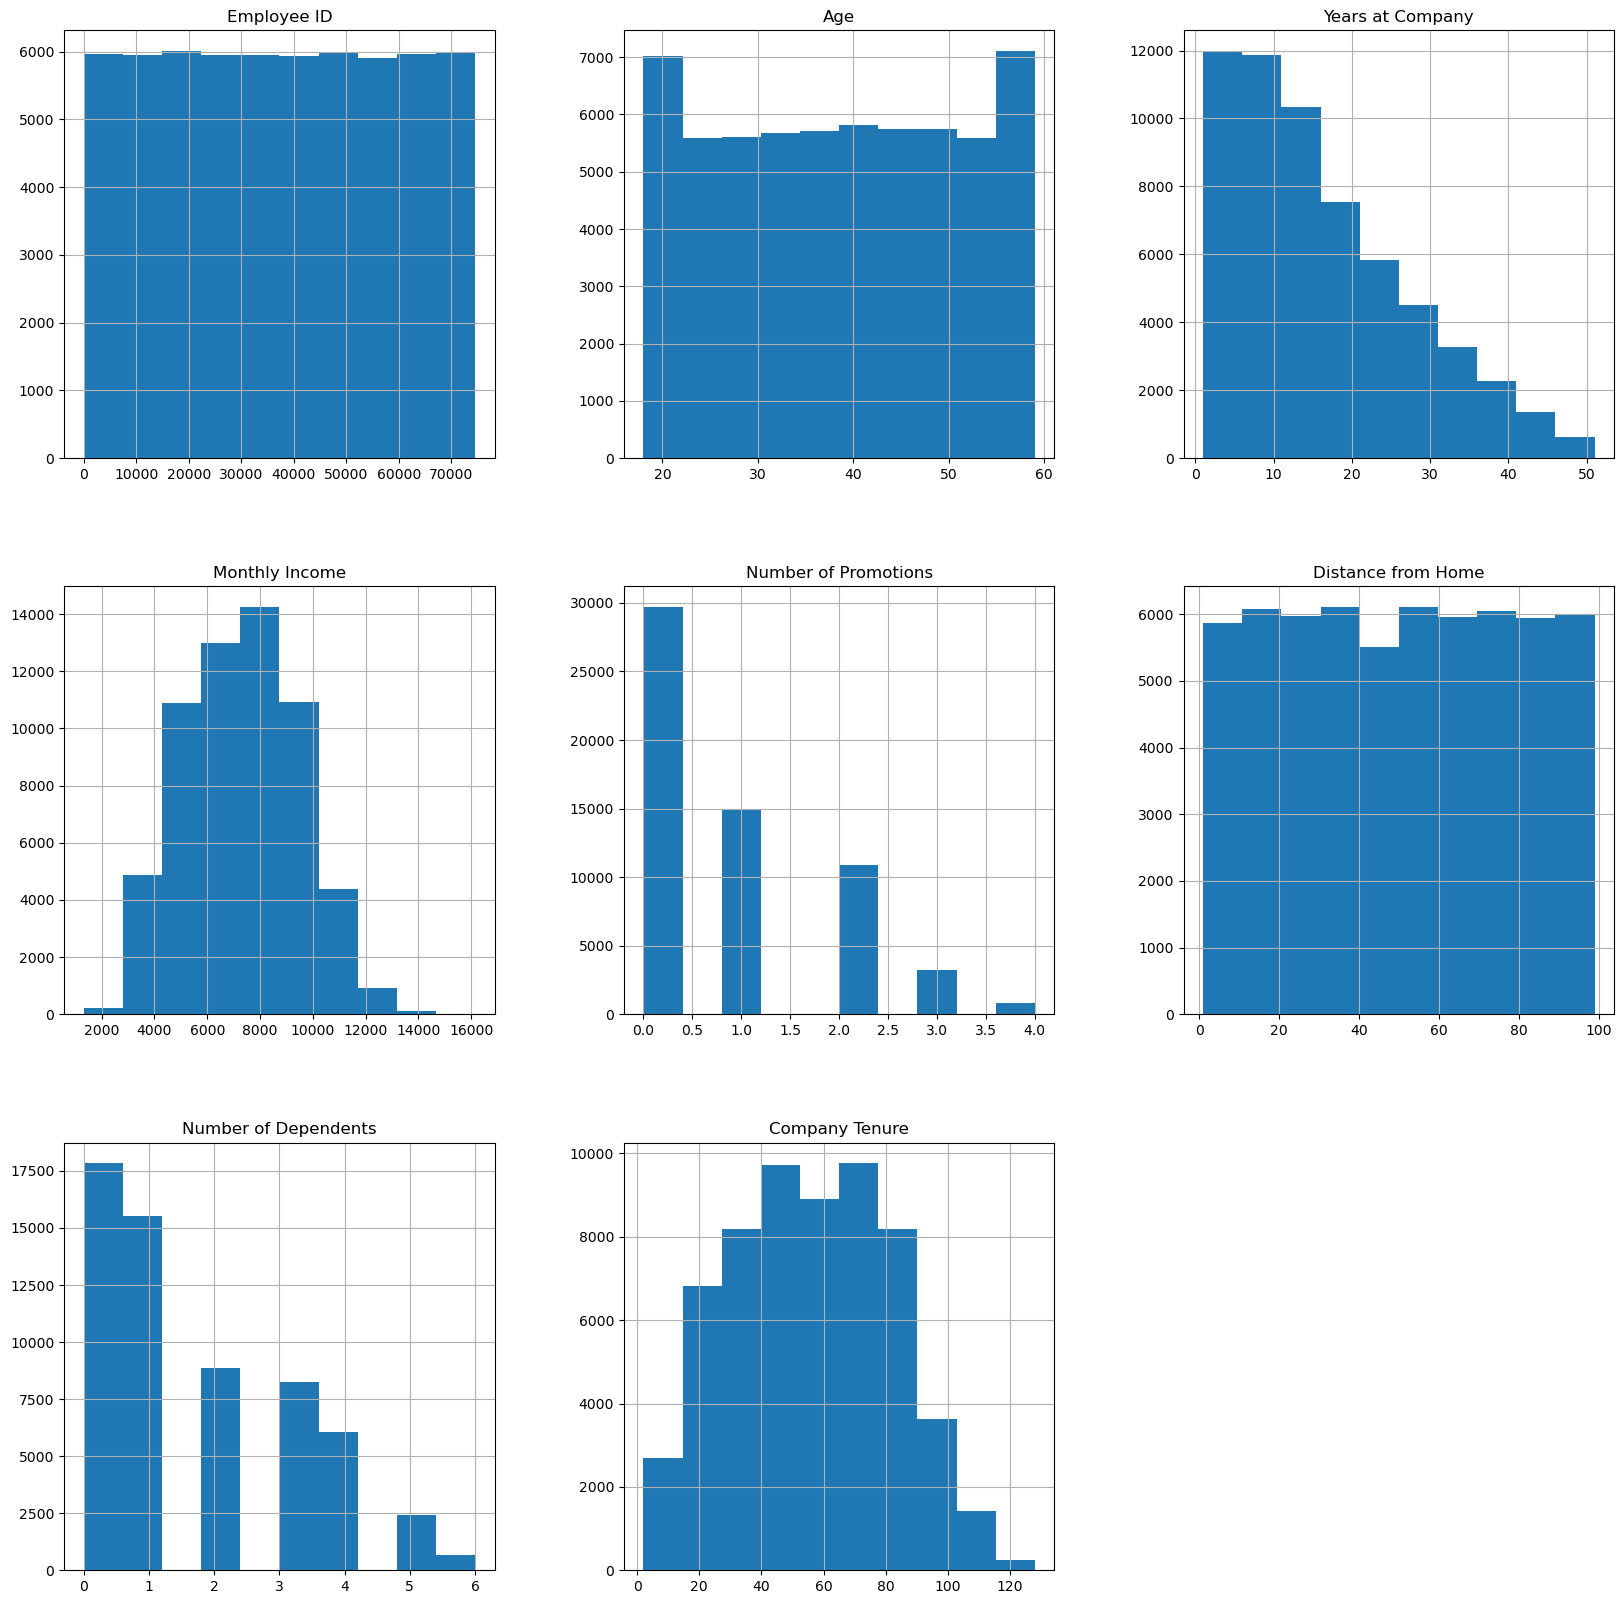

In [217]:
p = df.hist(figsize=(20, 20))

In [218]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [219]:
# Label encoding
columns = ['Gender','Job Role','Overtime','Education Level','Marital Status','Company Size','Remote Work',
              'Leadership Opportunities', 'Innovation Opportunities','Work-Life Balance', 'Job Satisfaction','Performance Rating',
              'Company Reputation','Job Level', 'Employee Recognition', 'Attrition']


label_encoders = {col: LabelEncoder() for col in columns}


for col in columns:
    df[col] = label_encoders[col].fit_transform(df[col])

In [220]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2,0,22,0,1,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3,0,21,3,0,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0,0,11,1,1,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1,0,27,2,2,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0,1,71,2,0,0,2,1,68,0,0,0,1,2,1


In [221]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [222]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2,0,22,0,1,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3,0,21,3,0,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0,0,11,1,1,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1,0,27,2,2,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0,1,71,2,0,0,2,1,68,0,0,0,1,2,1


In [223]:
# drop the Attrition column
x=df.iloc[:, :-1]

In [224]:
x.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,8410,31,1,19,0,5390,0,2,0,2,0,22,0,1,0,1,1,89,0,0,0,0,2
1,64756,59,0,4,3,5534,3,0,3,3,0,21,3,0,3,1,1,21,0,0,0,1,1
2,30257,24,0,10,2,8159,2,0,3,0,0,11,1,1,3,1,1,74,0,0,0,3,1
3,65791,36,0,7,0,3989,2,0,2,1,0,27,2,2,2,1,2,50,1,0,0,2,2
4,65026,56,1,41,0,4821,1,3,0,0,1,71,2,0,0,2,1,68,0,0,0,1,2


In [225]:
y=df.iloc[:,-1]

In [226]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [228]:
print(x.shape, x_train.shape, x_test.shape)

(59598, 23) (47678, 23) (11920, 23)


In [229]:
TestData=x_test.join(y_test)

In [230]:
TrainData=x_train.join(y_train)

In [231]:
column = ['Attrition',
          'Age','Gender',
          'Years at Company',
          'Job Role','Marital Status',
          'Education Level',
          'Job Level',
          'Number of Dependents',
          'Monthly Income',
          'Work-Life Balance',
          'Job Satisfaction','Overtime',
          'Distance from Home','Company Size',
          'Company Tenure','Remote Work',
          'Leadership Opportunities',
          'Innovation Opportunities',
          'Company Reputation',
          'Employee Recognition',
         ]

In [232]:
TestData=TestData[column]
TestData.head()
                  

,Attrition,Age,Gender,Years at Company,Job Role,Marital Status,Education Level,Job Level,Number of Dependents,Monthly Income,Work-Life Balance,Job Satisfaction,Overtime,Distance from Home,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
44367,1,25,0,1,4,1,2,0,0,9231,2,0,0,19,1,30,0,0,0,0,1
14659,0,44,0,35,0,0,0,0,0,2964,1,0,1,71,2,83,0,0,0,3,2
9185,1,39,1,15,4,2,1,0,1,11221,2,0,1,15,1,54,0,0,1,2,1
55760,0,32,0,2,1,1,3,0,4,8761,1,2,0,44,1,3,0,0,0,0,1
55694,1,44,1,6,2,1,0,0,1,8104,2,0,0,60,2,73,1,0,0,2,1


In [233]:
TrainData = TrainData[column]
TrainData.head()

,Attrition,Age,Gender,Years at Company,Job Role,Marital Status,Education Level,Job Level,Number of Dependents,Monthly Income,Work-Life Balance,Job Satisfaction,Overtime,Distance from Home,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
17637,0,39,1,16,4,2,2,0,2,9827,1,0,1,52,2,29,1,0,0,1,0
17979,0,28,1,16,4,0,1,0,0,11600,2,2,0,33,1,79,0,0,0,0,0
22493,0,57,1,5,0,0,3,1,0,4844,1,2,0,92,2,13,0,0,0,1,0
54113,0,43,0,2,4,2,1,0,1,9202,3,1,1,43,1,3,0,0,0,1,2
41717,1,29,1,17,4,1,3,1,0,13414,3,3,0,44,1,88,0,0,0,2,2


In [234]:
TestData = TestData [column[1:]]
TestData.head()

,Age,Gender,Years at Company,Job Role,Marital Status,Education Level,Job Level,Number of Dependents,Monthly Income,Work-Life Balance,Job Satisfaction,Overtime,Distance from Home,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
44367,25,0,1,4,1,2,0,0,9231,2,0,0,19,1,30,0,0,0,0,1
14659,44,0,35,0,0,0,0,0,2964,1,0,1,71,2,83,0,0,0,3,2
9185,39,1,15,4,2,1,0,1,11221,2,0,1,15,1,54,0,0,1,2,1
55760,32,0,2,1,1,3,0,4,8761,1,2,0,44,1,3,0,0,0,0,1
55694,44,1,6,2,1,0,0,1,8104,2,0,0,60,2,73,1,0,0,2,1


In [235]:
TrainData.to_csv('TrainData.csv',index=False, index_label='Row',header=False, columns=column)

In [236]:
TestData.to_csv('TestData.csv',index=False, index_label='Row',header=False, columns=column)

KeyError: "['Attrition'] not in index"

In [ ]:
# import libraries
import boto3
import re

In [ ]:
# Create the files to load the data
bucketName = 'evy12345'
TrainFile = r'AttritionData/TrainData/TrainData.csv'
TestFile = r'AttritionData/TestData/TestData.csv'
valFile = r'AttritionModel/val/val.csv'
model = r'AttritionModel/model'

In [ ]:
# load the data to s3
s3ModelOutput = r's3://{0}/{1}'.format(bucketName, model)
s3Train = r's3://{0}/{1}'.format(bucketName, TrainFile)
s3Test = r's3://{0}/{1}'.format(bucketName, TestFile)
s3Val = r's3://{0}/{1}'.format(bucketName, valFile)

In [ ]:
# The path of my s3 bucket
s3ModelOutput

In [ ]:
with open('TrainData.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucketName).Object(TrainFile).upload_fileobj(f)

In [237]:
with open('TestData.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucketName).Object(TestFile).upload_fileobj(f)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [238]:
# Train the model

In [251]:
import sagemaker
from sagemaker import get_execution_role

In [252]:
sagemakerSess=sagemaker.Session()
role=get_execution_role()

In [253]:
sagemakerSess.boto_region_name

'us-east-1'

In [254]:
ECRdockercontainer=sagemaker.amazon.amazon_estimator.get_image_uri(sagemakerSess.boto_region_name,'linear-learner','latest')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [255]:
LogisticEmployeeAttrition=sagemaker.estimator.Estimator(image_uri=ECRdockercontainer,
                                           role=role,
                                            train_instance_count=1,
                                            train_instance_type='ml.m4.xlarge',
                                            output_path=s3ModelOutput,
                                            sagemaker_session=sagemakerSess,
                                            base_job_name = 'Logistic-Demo-v1'
                                           )

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [256]:
LogisticEmployeeAttrition.set_hyperparameters(predictor_type='binary_classifier', mini_batch_size = 100) 

In [257]:
LogisticEmployeeAttrition.hyperparameters()

{'predictor_type': 'binary_classifier', 'mini_batch_size': 100}

In [258]:
trainConfig=sagemaker.session.s3_input(s3_data=s3Train,content_type='text/csv')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [259]:
LogisticEmployeeAttrition.fit({'train':trainConfig})

INFO:sagemaker:Creating training-job with name: Logistic-Demo-v1-2024-08-21-08-40-46-557


2024-08-21 08:40:46 Starting - Starting the training job...
2024-08-21 08:41:01 Starting - Preparing the instances for training...
2024-08-21 08:41:39 Downloading - Downloading input data...
2024-08-21 08:42:04 Downloading - Downloading the training image.........
2024-08-21 08:43:21 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/21/2024 08:43:33 INFO 140382492686144] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss':

In [261]:
#Deploying the Trained Model

Model=LogisticEmployeeAttrition.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge',
                                   endpoint_name = 'EmployeeAttrition')

INFO:sagemaker:Creating model with name: Logistic-Demo-v1-2024-08-21-08-53-34-497
INFO:sagemaker:Creating endpoint-config with name EmployeeAttrition
INFO:sagemaker:Creating endpoint with name EmployeeAttrition


--------!